"\nLOL! This doesn't look so hot, but I think I need to be a bit more careful when defining my \nHamiltonian. \n1. Remember to change initial state to the ground state. \n2. The omega only applies to the atomic state... I'm not sure if it's included in the coupling terms.\nI feel like it is, but we can try both. \nSo let's try this again but with some of these changes. \n"

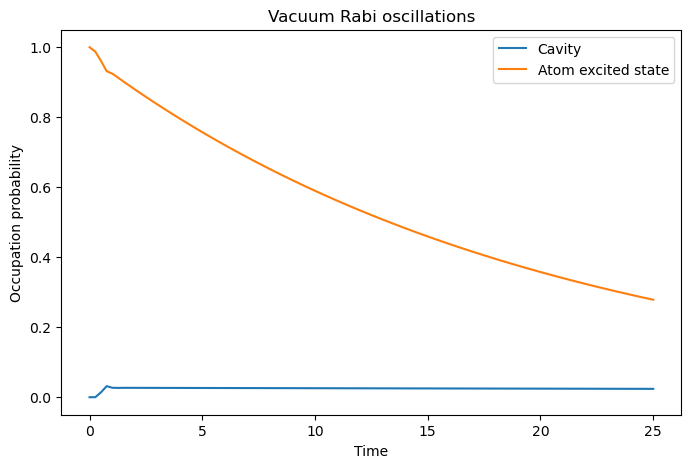

In [5]:
'''
Now to add an excitation pulse, ammending the code to correct the Hamiltonian
'''

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from qutip import *

wc = 1.0  * 2 * np.pi  # cavity frequency
wa = 1.0  * 2 * np.pi  # atom frequency
g  = 0.05 * 2 * np.pi  # coupling strength
kappa = 0.005          # cavity dissipation rate
gamma = 0.05           # atom dissipation rate
N = 15                 # number of cavity fock states
n_th_a = 0.0           # temperature in frequency units
use_rwa = True

tlist = np.linspace(0,25,100) 

#Gaussian Pulse, for now I'm just going to take what I had in the 2-Level System Code and go for gold. 
tp = 0.060       # Gaussian pulse parameter - used the parameter given on the site 
Om = 19.40                   # driving strength - used parameter given on the site
t_offset = 0.405 #temporal offset for the first photon - used parameter given on the site
pulse_shape = Om/2 * np.exp(-(tlist - t_offset) ** 2 /
                                (2 * tp ** 2))

# intial state
psi0 = tensor(basis(N,0), basis(2,1))    # start with an excited atom 
#Change to ground when adding the Gaussian


# operators
a  = tensor(destroy(N), qeye(2))
sm = tensor(qeye(N), destroy(2))

# Hamiltonian
if use_rwa:
    H_C = wc * a.dag() * a 
    H_A = wa * sm.dag() * sm + g * (a.dag() * sm + a * sm.dag())
else:
    H_C = wc * a.dag() * a 
    H_A = wa * sm.dag() * sm + g * (a.dag() + a) * (sm + sm.dag())
#The Hamiltonian with consideration to pulse
H_I=[H_A,pulse_shape]

#Now for the full Hamiltonian
H=[H_C,H_I]
    
'''
So notice the difference between the RWA and the non-RWA only the coupling terms are considered in the
RWA whereas the non-coupling terms are included in the non-RWA. I think they made a mistake when
writing out the Hamiltonian in the code. 
'''

#So notice the difference between the RWA and the non-RWA only the coupling terms are considered in 
#the RWA whereas the non-coupling terms are included in the non-RWA. I think they made a mistake when
#writing out the Hamiltonian in the code. 

c_op_list = []

rate = kappa * (1 + n_th_a)
if rate > 0.0:
    c_op_list.append(np.sqrt(rate) * a)

rate = kappa * n_th_a
if rate > 0.0:
    c_op_list.append(np.sqrt(rate) * a.dag())

rate = gamma
if rate > 0.0:
    c_op_list.append(np.sqrt(rate) * sm)
    
#I like the way this is written, perhaps something to yoink into your code. 

output = mesolve(H, psi0, tlist, c_op_list, [a.dag() * a, sm.dag() * sm])

# e_ops could've been simplified with the number operator.

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(tlist, output.expect[0], label="Cavity")
ax.plot(tlist, output.expect[1], label="Atom excited state")
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Occupation probability')
ax.set_title('Vacuum Rabi oscillations');

'''
LOL! This doesn't look so hot, but I think I need to be a bit more careful when defining my 
Hamiltonian. 
1. Remember to change initial state to the ground state. 
2. The omega only applies to the atomic state... I'm not sure if it's included in the coupling terms.
I feel like it is, but we can try both. - Ok so this changed nothing. Now try without the coupling
term. 
So let's try this again but with some of these changes. 
'''
